In [2]:
! pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.6 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=44858d1e480fc6a23cf0707561a72850696298fda83a9c8445b9182194977822
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=8670057aa405890701cf8d6a32c6b20c34651223d4a7f1f28fa8f88fcb9b8ab4
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully buil

In [5]:
import openml

dataset = openml.datasets.get_dataset(31)

dataset

<ipython-input-5-761f527ccd57>:3: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(31)


OpenML Dataset
Name..........: credit-g
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:47
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/31/credit-g.arff
OpenML URL....: https://www.openml.org/d/31
# of features.: 21
# of instances: 1000

In [7]:
X, y, w1, w2 = dataset.get_data(dataset_format="dataframe")

In [8]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [15]:
X["checking_status"].unique()

['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['<0' < '0<=X<200' < '>=200' < 'no checking']

In [17]:
X["personal_status"]

0             male single
1      female div/dep/mar
2             male single
3             male single
4             male single
              ...        
995    female div/dep/mar
996          male div/sep
997           male single
998           male single
999           male single
Name: personal_status, Length: 1000, dtype: category
Categories (5, object): ['male div/sep' < 'female div/dep/mar' < 'male single' < 'male mar/wid' <
                         'female single']

In [51]:
import numpy as np

def statusToGender(personal_status):
  return personal_status.split(" ")[0]

X["GENDER"] = X["personal_status"].map(statusToGender).map({ "male": 1., "female": -1. }).astype(np.float64)
X["RISK"] = X["class"].map({ "good": 1.0, "bad": -1.0 }).astype(np.float64)

X[["GENDER", "RISK"]]

,GENDER,RISK
0,1.0,1.0
1,-1.0,-1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,-1.0
...,...,...
995,-1.0,1.0
996,1.0,1.0
997,1.0,1.0
998,1.0,-1.0


In [52]:
X["RISK"]

0      1.0
1     -1.0
2      1.0
3      1.0
4     -1.0
      ... 
995    1.0
996    1.0
997    1.0
998   -1.0
999    1.0
Name: RISK, Length: 1000, dtype: float64

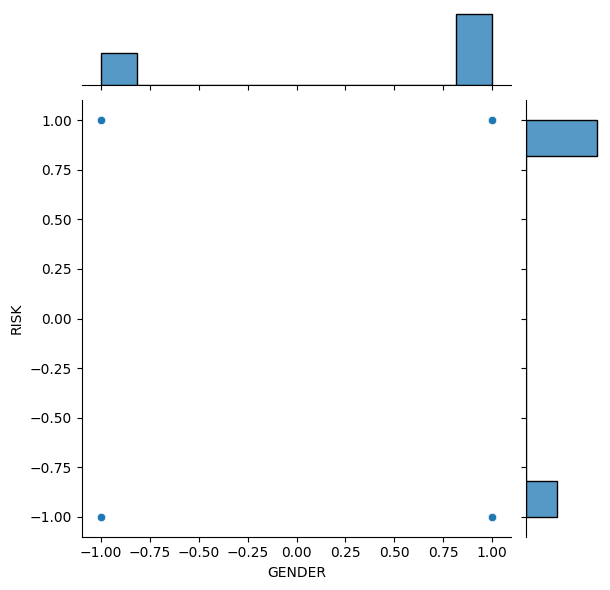

In [53]:
import seaborn as sns

sns.jointplot(X, x="GENDER", y="RISK")

<Axes: xlabel='GENDER', ylabel='RISK'>

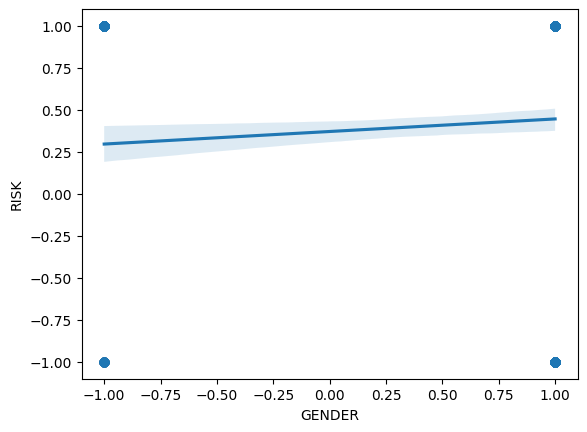

In [54]:
sns.regplot(X, x="GENDER", y="RISK")

In [28]:
X["GENDER"].corr(X["RISK"])

0.07549269735627602

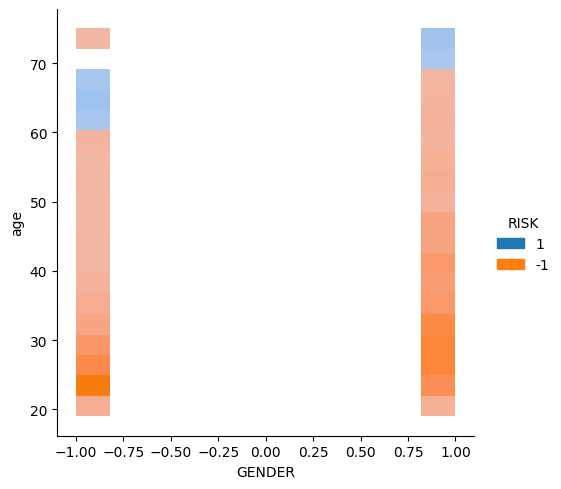

In [32]:
sns.displot(X, x="GENDER", y="age", hue="RISK")

In [33]:
X[["GENDER", "age", "RISK"]]

,GENDER,age,RISK
0,1,67,1
1,-1,22,-1
2,1,49,1
3,1,45,1
4,1,53,-1
...,...,...,...
995,-1,31,1
996,1,40,1
997,1,38,1
998,1,23,-1


In [55]:
def ageToGroup(age):
  if age <= 20:
    return 1
  elif age > 20 and age <= 30:
    return 2
  elif age > 30 and age <= 40:
    return 3
  elif age > 40 and age <= 50:
    return 4
  elif age > 50:
    return 5
  else:
    return 0

X["AGE_GROUP"] = X["age"].map(ageToGroup)

X[["GENDER", "AGE_GROUP", "RISK"]]

,GENDER,AGE_GROUP,RISK
0,1.0,5,1.0
1,-1.0,2,-1.0
2,1.0,4,1.0
3,1.0,4,1.0
4,1.0,5,-1.0
...,...,...,...
995,-1.0,3,1.0
996,1.0,3,1.0
997,1.0,3,1.0
998,1.0,2,-1.0


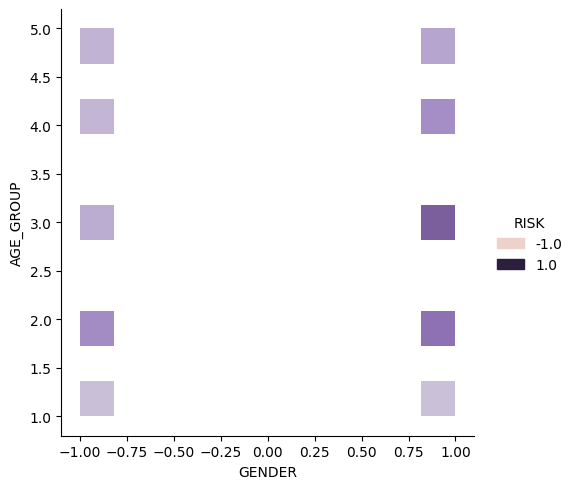

In [56]:
sns.displot(X, x="GENDER", y="AGE_GROUP", hue="RISK")

In [60]:
r1 = X[["GENDER", "AGE_GROUP", "RISK"]].groupby("AGE_GROUP").aggregate("count").copy()

r1 # total de elementos por grupo de edad

,GENDER,RISK
AGE_GROUP,,
1,16,16
2,395,395
3,315,315
4,161,161
5,113,113


In [62]:
r2 = X[["GENDER", "AGE_GROUP", "RISK"]].groupby("AGE_GROUP").aggregate("sum").copy()

r2

,GENDER,RISK
AGE_GROUP,,
1,-4.0,4.0
2,51.0,111.0
3,189.0,155.0
4,101.0,79.0
5,43.0,51.0


In [73]:
r3 = r1.join(r2, lsuffix="_TOTAL", rsuffix="_SUM")

r3

,GENDER_TOTAL,RISK_TOTAL,GENDER_SUM,RISK_SUM
AGE_GROUP,,,,
1,16,16,-4.0,4.0
2,395,395,51.0,111.0
3,315,315,189.0,155.0
4,161,161,101.0,79.0
5,113,113,43.0,51.0


In [74]:
r3["GENDER_PCT"] = r3["GENDER_SUM"] / r3["GENDER_TOTAL"]

r3

,GENDER_TOTAL,RISK_TOTAL,GENDER_SUM,RISK_SUM,GENDER_PCT
AGE_GROUP,,,,,
1,16,16,-4.0,4.0,-0.250000
2,395,395,51.0,111.0,0.129114
3,315,315,189.0,155.0,0.600000
4,161,161,101.0,79.0,0.627329
5,113,113,43.0,51.0,0.380531


In [87]:
r3["GENDER_PCT"] = r3["GENDER_SUM"] / r3["GENDER_TOTAL"]
r3["GENDER_BASE_MIN"] = (r3["GENDER_TOTAL"] - r3["GENDER_PCT"].abs() * r3["GENDER_TOTAL"]) / 2
r3["GENDER_BASE_MAX"] = (r3["GENDER_TOTAL"] - r3["GENDER_PCT"].abs() * r3["GENDER_TOTAL"]) / 2 + r3["GENDER_PCT"].abs() * r3["GENDER_TOTAL"]

r3["FEMALE"] = (r3["GENDER_PCT"] < 0).map({True: 1, False: 0}) * r3["GENDER_BASE_MAX"] + ((r3["GENDER_PCT"] < 0).map({True: 0, False: 1}) * r3["GENDER_BASE_MIN"])
r3["MALE"] = (r3["GENDER_PCT"] < 0).map({True: 0, False: 1}) * r3["GENDER_BASE_MAX"] + ((r3["GENDER_PCT"] < 0).map({True: 1, False: 0}) * r3["GENDER_BASE_MIN"])

r3["RISK_PCT"] = r3["RISK_SUM"] / r3["RISK_TOTAL"]
r3["RISK_BASE_MIN"] = (r3["RISK_TOTAL"] - r3["RISK_PCT"].abs() * r3["RISK_TOTAL"]) / 2
r3["RISK_BASE_MAX"] = (r3["RISK_TOTAL"] - r3["RISK_PCT"].abs() * r3["RISK_TOTAL"]) / 2 + r3["RISK_PCT"].abs() * r3["RISK_TOTAL"]

r3["BAD"] = (r3["RISK_PCT"] < 0).map({True: 1, False: 0}) * r3["RISK_BASE_MAX"] + ((r3["RISK_PCT"] < 0).map({True: 0, False: 1}) * r3["RISK_BASE_MIN"])
r3["GOOD"] = (r3["RISK_PCT"] < 0).map({True: 0, False: 1}) * r3["RISK_BASE_MAX"] + ((r3["RISK_PCT"] < 0).map({True: 1, False: 0}) * r3["RISK_BASE_MIN"])

r3["RISK_REL_GOOD_BAD"] = r3["BAD"] / r3["GOOD"]

r3

,GENDER_TOTAL,RISK_TOTAL,GENDER_SUM,RISK_SUM,GENDER_PCT,GENDER_BASE_MIN,GENDER_BASE_MAX,FEMALE,MALE,RISK_REL,RISK_PCT,RISK_BASE_MIN,RISK_BASE_MAX,BAD,GOOD,RISK_REL_GOOD_BAD
AGE_GROUP,,,,,,,,,,,,,,,,
1,16,16,-4.0,4.0,-0.250000,6.0,10.0,10.0,6.0,0.500000,0.250000,6.0,10.0,6.0,10.0,0.600000
2,395,395,51.0,111.0,0.129114,172.0,223.0,172.0,223.0,0.562025,0.281013,142.0,253.0,142.0,253.0,0.561265
3,315,315,189.0,155.0,0.600000,63.0,252.0,63.0,252.0,0.984127,0.492063,80.0,235.0,80.0,235.0,0.340426
4,161,161,101.0,79.0,0.627329,30.0,131.0,30.0,131.0,0.981366,0.490683,41.0,120.0,41.0,120.0,0.341667
5,113,113,43.0,51.0,0.380531,35.0,78.0,35.0,78.0,0.902655,0.451327,31.0,82.0,31.0,82.0,0.378049


In [91]:
r4 = r3[["FEMALE", "MALE", "BAD", "GOOD", "RISK_REL_GOOD_BAD"]].copy()

r4

,FEMALE,MALE,BAD,GOOD,RISK_REL_GOOD_BAD
AGE_GROUP,,,,,
1,10.0,6.0,6.0,10.0,0.600000
2,172.0,223.0,142.0,253.0,0.561265
3,63.0,252.0,80.0,235.0,0.340426
4,30.0,131.0,41.0,120.0,0.341667
5,35.0,78.0,31.0,82.0,0.378049


In [95]:
Y = X.merge(r4, left_on="AGE_GROUP", right_on="AGE_GROUP")

Y

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,foreign_worker,class,GENDER,RISK,AGE_GROUP,FEMALE,MALE,BAD,GOOD,RISK_REL_GOOD_BAD
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,yes,good,1.0,1.0,5,35.0,78.0,31.0,82.0,0.378049
1,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,yes,bad,1.0,-1.0,5,35.0,78.0,31.0,82.0,0.378049
2,no checking,24,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3,male single,none,...,yes,good,1.0,1.0,5,35.0,78.0,31.0,82.0,0.378049
3,no checking,12,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2,male div/sep,none,...,yes,good,1.0,1.0,5,35.0,78.0,31.0,82.0,0.378049
4,<0,24,critical/other existing credit,new car,1199.0,<100,>=7,4,male single,none,...,yes,bad,1.0,-1.0,5,35.0,78.0,31.0,82.0,0.378049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<0,18,existing paid,furniture/equipment,2039.0,<100,1<=X<4,1,female div/dep/mar,none,...,yes,bad,-1.0,-1.0,1,10.0,6.0,6.0,10.0,0.600000
996,0<=X<200,24,existing paid,new car,2718.0,<100,1<=X<4,3,female div/dep/mar,none,...,yes,bad,-1.0,-1.0,1,10.0,6.0,6.0,10.0,0.600000
997,no checking,9,existing paid,furniture/equipment,1980.0,<100,<1,2,female div/dep/mar,co applicant,...,yes,bad,-1.0,-1.0,1,10.0,6.0,6.0,10.0,0.600000
998,no checking,15,existing paid,furniture/equipment,2221.0,500<=X<1000,1<=X<4,2,female div/dep/mar,none,...,yes,good,-1.0,1.0,1,10.0,6.0,6.0,10.0,0.600000


<Axes: xlabel='RISK_REL_GOOD_BAD', ylabel='RISK'>

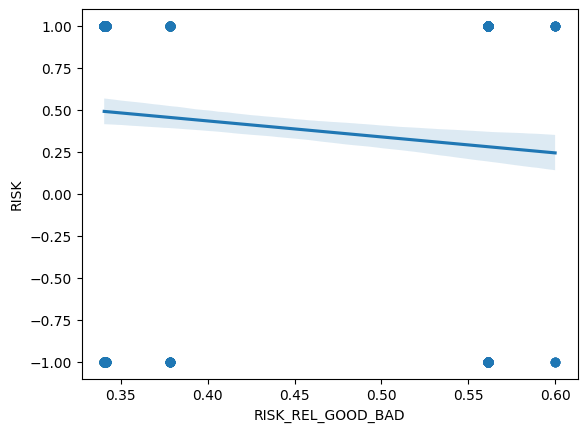

In [97]:
import seaborn as sns

sns.regplot(Y, x="RISK_REL_GOOD_BAD", y="RISK")

In [98]:
Y["RISK"].corr(Y["RISK_REL_GOOD_BAD"])

-0.11041697585611965

In [103]:
X.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,GENDER,RISK,AGE_GROUP
496,0<=X<200,36,existing paid,furniture/equipment,9034.0,100<=X<500,<1,4,male single,co applicant,...,rent,1,high qualif/self emp/mgmt,1,yes,yes,bad,1.0,-1.0,2
495,<0,24,existing paid,furniture/equipment,2996.0,no known savings,1<=X<4,2,male mar/wid,none,...,own,1,skilled,1,none,yes,bad,1.0,-1.0,1
866,<0,18,existing paid,radio/tv,2389.0,<100,<1,4,female div/dep/mar,none,...,own,1,skilled,1,none,yes,good,-1.0,1.0,2
534,no checking,24,existing paid,radio/tv,3105.0,no known savings,<1,4,male single,none,...,own,2,skilled,1,none,yes,good,1.0,1.0,2
82,no checking,18,existing paid,business,1568.0,100<=X<500,1<=X<4,3,female div/dep/mar,none,...,rent,1,unskilled resident,1,none,yes,good,-1.0,1.0,2
991,no checking,15,all paid,radio/tv,1569.0,100<=X<500,>=7,4,male single,none,...,own,1,unskilled resident,2,none,yes,good,1.0,1.0,3
849,<0,12,existing paid,radio/tv,709.0,<100,>=7,4,male single,none,...,own,1,unskilled resident,1,none,yes,bad,1.0,-1.0,5
745,<0,13,critical/other existing credit,business,1797.0,<100,<1,3,male single,none,...,own,2,unskilled resident,1,none,yes,good,1.0,1.0,2
159,no checking,6,critical/other existing credit,radio/tv,1898.0,no known savings,1<=X<4,1,male single,none,...,own,2,unskilled resident,2,none,yes,good,1.0,1.0,3
865,no checking,15,existing paid,furniture/equipment,2221.0,500<=X<1000,1<=X<4,2,female div/dep/mar,none,...,rent,1,skilled,1,none,yes,good,-1.0,1.0,1


In [104]:
X["checking_status"].unique()

['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['<0' < '0<=X<200' < '>=200' < 'no checking']

In [108]:
X["credit_history"].unique()

['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
Categories (5, object): ['no credits/all paid' < 'all paid' < 'existing paid' < 'delayed previously' <
                         'critical/other existing credit']

In [111]:
X["x1"] = X["checking_status"].map({ "<0": 0, "no checking": -1, "0<=X<200": 1, ">=200": 2 })
X["x2"] = X["duration"].map(lambda d: d / 24)
X["x3"] = X["credit_history"].map({
    "no credits/all paid": 1,
    "all paid": 2,
    "existing paid": 0,
    "delayed previously": -0.5,
    "critical/other existing credit": -2
})

X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,num_dependents,own_telephone,foreign_worker,class,GENDER,RISK,AGE_GROUP,x1,x2,x3
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,1,yes,yes,good,1.0,1.0,5,0,0.250,-2.0
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,1,none,yes,bad,-1.0,-1.0,2,1,2.000,0.0
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,2,none,yes,good,1.0,1.0,4,-1,0.500,-2.0
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,2,none,yes,good,1.0,1.0,4,0,1.750,0.0
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,2,none,yes,bad,1.0,-1.0,5,0,1.000,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,...,1,none,yes,good,-1.0,1.0,3,-1,0.500,0.0
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,...,1,yes,yes,good,1.0,1.0,3,0,1.250,0.0
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,...,1,none,yes,good,1.0,1.0,3,-1,0.500,0.0
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,...,1,yes,yes,bad,1.0,-1.0,2,0,1.875,0.0


In [ ]:
# TODO: Implementar un modelo de aprendizaje (Árbol de Decisión, M. Soporte Vectorial, Redes Neuronales)